In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_detached = "detached_apex.csv"

homes_data = pd.read_csv(file_detached)

In [2]:
homes_data.count()

MLS #                    5114
Status                   5114
Address                  5114
City                     5114
Zip                      5114
Closing Date             5114
Subdivision              5114
LvngAreaSF               5114
YrBlt                    5114
Beds                     5114
FBths                    5114
HBths                    5114
Property Type            5114
List Price               5114
Sold Price               5114
Days On Market           5114
HOA Y/N                  4571
Garage                   5114
Acres                    5114
Sold Price/List Price    5114
dtype: int64

In [3]:
homes_df = homes_data.copy()
homes_df = homes_df.rename(columns={"Sold Price": "SoldPrice"})
homes_df = homes_df.rename(columns={"List Price": "ListPrice"})

#remove $
homes_df['SoldPrice'] = homes_df.SoldPrice.str.lstrip('$')
homes_df['ListPrice'] = homes_df.ListPrice.str.lstrip('$')
#remove comma
homes_df['SoldPrice'] = homes_df['SoldPrice'].str.replace(',', '').astype(float)
homes_df['ListPrice'] = homes_df['ListPrice'].str.replace(',', '').astype(float)
homes_df['LvngAreaSF'] = homes_df['LvngAreaSF'].str.replace(',', '').astype(int)


In [4]:
homes_df = homes_df[homes_df.SoldPrice > 75000]
homes_df = homes_df[homes_df.SoldPrice < 800000]
homes_df


,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
5,2228236,CLOSED,304 S Hughes Street,Apex,27502,1/8/2019,Not in a Subdivision,964,1948,1,1,0,Detached,105000.0,105000.0,0,NaN,0,0-.25 Acres,1.00
6,2217507,CLOSED,2700 Optimist Farm Road,Apex,27539-8605,1/18/2019,Not in a Subdivision,1143,1910,2,1,0,Detached,125000.0,110000.0,38,No,0,1-2.9 Acres,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2152422,CLOSED,1221 Lowland Street,Apex,27523,8/3/2020,Sweetwater,4653,2018,4,5,0,Detached,797500.0,797500.0,11,Yes,2,.26-.5 Acres,1.00
4908,2294624,CLOSED,1831 Old Evergreen Drive,Apex,27502,7/13/2020,Stillwater,3842,2020,4,4,1,Detached,799155.0,799155.0,0,Yes,3,.26-.5 Acres,1.00
4909,2190515,CLOSED,3138 Curling Creek Drive,Apex,27502,3/29/2019,Stillwater,4261,2018,5,5,1,Detached,799750.0,799750.0,0,Yes,3,.26-.5 Acres,1.00
4910,2149293,CLOSED,2080 Vandiver Way,Apex,27523,3/11/2019,Providence at Yates Pond,4373,2017,5,4,1,Detached,799900.0,799900.0,0,Yes,3,.26-.5 Acres,1.00


In [5]:
#randomize data frames
random_homes_df = homes_df.sample(frac=1)
random_homes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
58,2222027,CLOSED,8509 Manns Loop Road,Apex,27539,11/30/2018,Not in a Subdivision,1600,1976,3,2,0,Detached,200870.0,200870.0,0,No,4,.51-.75 Acres,1.00
2989,2225025,CLOSED,572 Duggins Point,Apex,27523,12/21/2018,Greenmoor,3048,2019,5,4,0,Detached,469900.0,466000.0,0,Yes,2,0-.25 Acres,0.99
2483,2194574,CLOSED,313 Bountywood Drive,Apex,27539,7/25/2018,Woodcreek,3220,2012,5,4,0,Detached,439900.0,427000.0,5,NaN,2,0-.25 Acres,0.97
3325,2163040,CLOSED,2405 Fillmore Hall Lane,Apex,27523,8/29/2018,Crestmont,3243,2018,5,4,0,Detached,490425.0,490425.0,0,Yes,2,0-.25 Acres,1.00
3981,2264964,CLOSED,3165 Zebroid Way,Apex,27523,5/26/2020,Woodbury,3360,2020,4,3,1,Detached,422900.0,544125.0,0,Yes,2,0-.25 Acres,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,2241216,CLOSED,1489 Rowboat Road,Apex,27502,8/9/2019,Smith Farm,3320,2019,5,4,0,Detached,489990.0,479990.0,0,Yes,2,0-.25 Acres,0.98
1894,2155677,CLOSED,112 Kellyridge Drive,Apex,27502,1/26/2018,Abbington,2587,1998,3,2,1,Detached,395000.0,387000.0,14,Yes,2,.26-.5 Acres,0.98
1997,2267401,CLOSED,1201 Applethorn Drive,Apex,27502,9/5/2019,Whitehall Manor,2400,2005,4,2,1,Detached,395000.0,395000.0,3,Yes,2,0-.25 Acres,1.00
2018,2221437,CLOSED,2571 Collection Court,Apex,27562,1/22/2019,Woodbury,2360,2018,3,3,0,Detached,409900.0,395400.0,0,Yes,2,0-.25 Acres,0.96


In [6]:
#copy df
house_data = random_homes_df
#copy Subdivision column data
house_data["Sub#"] = house_data["Subdivision"]


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sub#'. 
house_data['Sub#']= label_encoder.fit_transform(house_data['Sub#'])
house_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,...,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price,Sub#
58,2222027,CLOSED,8509 Manns Loop Road,Apex,27539,11/30/2018,Not in a Subdivision,1600,1976,3,...,0,Detached,200870.0,200870.0,0,No,4,.51-.75 Acres,1.00,153
2989,2225025,CLOSED,572 Duggins Point,Apex,27523,12/21/2018,Greenmoor,3048,2019,5,...,0,Detached,469900.0,466000.0,0,Yes,2,0-.25 Acres,0.99,86
2483,2194574,CLOSED,313 Bountywood Drive,Apex,27539,7/25/2018,Woodcreek,3220,2012,5,...,0,Detached,439900.0,427000.0,5,NaN,2,0-.25 Acres,0.97,270
3325,2163040,CLOSED,2405 Fillmore Hall Lane,Apex,27523,8/29/2018,Crestmont,3243,2018,5,...,0,Detached,490425.0,490425.0,0,Yes,2,0-.25 Acres,1.00,51
3981,2264964,CLOSED,3165 Zebroid Way,Apex,27523,5/26/2020,Woodbury,3360,2020,4,...,1,Detached,422900.0,544125.0,0,Yes,2,0-.25 Acres,1.29,269


In [29]:
#create subdivision dictionary
sub_dict = pd.Series(house_data.Subdivision.values,index=house_data['Sub#']).to_dict()
sub_dict

{153: 'Not in a Subdivision',
 86: 'Greenmoor',
 270: 'Woodcreek',
 51: 'Crestmont',
 269: 'Woodbury',
 232: 'The Preserve at White Oak Creek',
 271: 'Woodhall',
 189: 'Sancroft',
 199: 'Senter Farm',
 227: 'Sweetwater',
 114: 'Hunters Woods',
 234: 'The Villages of Apex',
 16: 'Blaney Farms',
 118: 'Jamison Park',
 139: 'Lynnhaven',
 272: 'Woodridge',
 27: 'Buckhorn Preserve',
 129: 'Lake Castleberry',
 1: 'Abbington',
 179: 'Rileys Pond',
 41: 'Chelsea Run',
 185: 'Saddlebrook',
 132: 'Langston',
 108: 'Hollands Crossing',
 200: 'Shepherds Vineyard',
 196: 'Scotts Mill',
 231: 'The Park at Langston',
 146: 'Middleton',
 167: 'Pearson Farms',
 213: 'Stratford at Abbington',
 203: 'Smith Farm',
 45: 'Colvin Park',
 230: 'The Park At West Lake',
 229: 'The Courtyards at Kildaire Farms',
 43: 'Clairmont',
 158: 'Olde Thompson Creek',
 11: 'Bella Casa',
 262: 'Whitehall Manor',
 154: 'Oak Chase',
 250: 'Weddington',
 219: 'Sunset Hills',
 91: 'Haddon Hall',
 223: 'Surrey Meadows',
 194: '

In [7]:
#homes model prep
X = house_data[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]]
y = house_data["SoldPrice"]
print(X.shape, y.shape)

(4910, 9) (4910,)


In [8]:
#normalize data
x_max = X.max()
x_min = X.min()
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [9]:
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

58      200870.0
2989    466000.0
2483    427000.0
3325    490425.0
3981    544125.0
          ...   
3158    479990.0
1894    387000.0
1997    395000.0
2018    395400.0
1309    353400.0
Name: SoldPrice, Length: 4910, dtype: float64

In [10]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [12]:
house_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
Sub#                       int32
dtype: object

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [14]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
Sub#                     float64
dtype: object

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
3682/3682 - 10s - loss: 0.0733
Epoch 2/100
3682/3682 - 10s - loss: 0.0654
Epoch 3/100
3682/3682 - 7s - loss: 0.0632
Epoch 4/100
3682/3682 - 8s - loss: 0.0618
Epoch 5/100
3682/3682 - 7s - loss: 0.0603
Epoch 6/100
3682/3682 - 6s - loss: 0.0596
Epoch 7/100
3682/3682 - 6s - loss: 0.0597
Epoch 8/100
3682/3682 - 6s - loss: 0.0591
Epoch 9/100
3682/3682 - 7s - loss: 0.0588
Epoch 10/100
3682/3682 - 7s - loss: 0.0580
Epoch 11/100
3682/3682 - 7s - loss: 0.0573
Epoch 12/100
3682/3682 - 7s - loss: 0.0573
Epoch 13/100
3682/3682 - 7s - loss: 0.0576
Epoch 14/100
3682/3682 - 8s - loss: 0.0570
Epoch 15/100
3682/3682 - 8s - loss: 0.0570
Epoch 16/100
3682/3682 - 9s - loss: 0.0570
Epoch 17/100
3682/3682 - 7s - loss: 0.0570
Epoch 18/100
3682/3682 - 10s - loss: 0.0569
Epoch 19/100
3682/3682 - 7s - loss: 0.0563
Epoch 20/100
3682/3682 - 7s - loss: 0.0562
Epoch 21/100
3682/3682 - 6s - loss: 0.0562
Epoch 22/100
3682/3682 - 6s - loss: 0.0559
Epoch 23/100
3682/3682 - 8s - loss: 0.0559
Epoch 24/100
3682

In [17]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

39/39 - 0s - loss: 0.0519
Loss: 0.051906950771808624


In [18]:
predictions = model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.5469811,
 0.8991063,
 0.43548572,
 0.25351793,
 0.2358875,
 0.36644056,
 0.5641054,
 0.16374329,
 0.55120575,
 0.34557143,
 0.4210888,
 0.20989288,
 0.2745636,
 0.5973457,
 0.34344032,
 0.30608526,
 0.56969213,
 0.4602998,
 0.4193282,
 0.57724535,
 0.35905546,
 0.6985338,
 0.50709575,
 0.42231813,
 0.59541327,
 0.34753394,
 0.39957488,
 0.25413308,
 0.6129744,
 0.63803774,
 0.43826783,
 0.5437231,
 0.86186713,
 0.81536853,
 0.27177176,
 0.29086182,
 0.37788185,
 0.57895285,
 0.23258649,
 0.8623797,
 0.25253105,
 0.4392469,
 0.33712894,
 0.5329285,
 0.18215829,
 0.5963048,
 0.4665236,
 0.5731698,
 0.586242,
 0.82710475,
 0.41174144,
 0.42477143,
 0.30173904,
 0.36193576,
 0.32603726,
 0.5094197,
 0.19129938,
 0.7168439,
 0.22008511,
 0.69070816,
 0.5906936,
 0.3820665,
 0.8529338,
 0.1749225,
 0.13952535,
 0.39166677,
 0.7494402,
 0.4268834,
 0.52587974,
 0.5009903,
 0.5545127,
 0.4196096,
 0.39563596,
 0.57579154,
 0.50392276,
 0.35001582,
 0.37029135,
 0.41866893,
 0.7682204,
 0.56

In [19]:
actuals = y_test
len(actuals)

1228

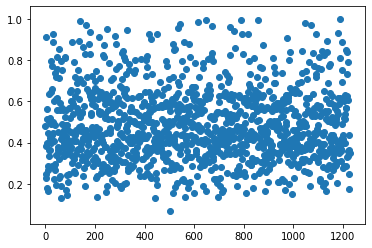

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,1228)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

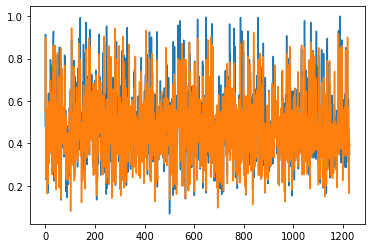

In [21]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


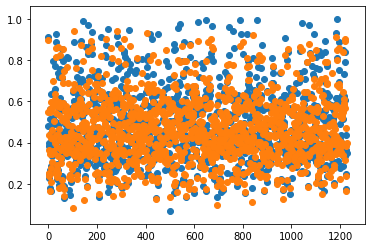

In [22]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)


In [23]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}')

Mean squared error: 0.006 
r2: 0.807


In [24]:
X_train

,YrBlt,Beds,FBths,LvngAreaSF,HBths,Days On Market,Garage,Sold Price/List Price,Sub#
1212,0.836957,0.250,0.250,0.302522,0.2,0.008596,0.333333,0.338235,0.880435
2652,0.880435,0.375,0.375,0.457254,0.2,0.022923,0.333333,0.367647,0.894928
2173,0.896739,0.375,0.250,0.357880,0.2,0.020057,0.333333,0.352941,0.144928
3100,0.994565,0.500,0.500,0.415778,0.0,0.000000,0.333333,0.338235,0.528986
4546,0.951087,0.500,0.500,0.687151,0.2,0.025788,0.500000,0.367647,0.152174
...,...,...,...,...,...,...,...,...,...
3953,0.896739,0.500,0.500,0.519045,0.0,0.040115,0.333333,0.367647,0.003623
2083,0.896739,0.375,0.250,0.402404,0.2,0.008596,0.333333,0.367647,0.112319
1181,0.978261,0.375,0.375,0.409683,0.0,0.000000,0.333333,0.352941,0.923913
3426,0.994565,0.500,0.375,0.481463,0.2,0.000000,0.333333,0.367647,0.898551


In [26]:
#["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]
test_input = [1980, 4 , 3, 1500, 0, 10, 1, 1, 193]



#normalize inputs
test_input_normal = (test_input-x_min)/(x_max-x_min)
#convert to tf array
array = tf.reshape(test_input_normal, [-1,9])
print(array)
print('____________________')


#run model
output = model.predict(array)
print(output)
print('____________________')


#unnormalize for final reports
Normal_output = output*(y_max-y_min)+y_min
Normal_output

tf.Tensor(
[[0.7826087  0.375      0.375      0.17267649 0.         0.0286533
  0.16666667 0.36764706 0.69927536]], shape=(1, 9), dtype=float64)
____________________
[[0.2230415]]
____________________


array([[249891.08]], dtype=float32)

In [30]:
#save model
model.save("home_price_prediction.h5")